<a href="https://colab.research.google.com/github/thoreau024/DATA-612-HW-Spencer-Flynn/blob/main/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
import time
import os
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_auc_score, f1_score
#import scikitplot as skplt
%matplotlib inline
np.random.seed(7)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

from tensorflow.keras import optimizers 

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import floor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, roc_curve
! pip install bayesian-optimization
#from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

#Base Libraries
import datetime as datetime

#Scientific Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Visual Libraries
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
from keras.metrics import Precision
precision = Precision()

#Helper Libraries
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

import math

! pip install bayesian-optimization
#from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization



import tensorflow as tf
from tensorflow import keras
from keras.losses import BinaryCrossentropy
from keras.metrics import Precision
precision = Precision()
from keras.layers import Dense, Dropout
!pip install -q -U keras-tuner
from keras_tuner import HyperModel
from keras_tuner import BayesianOptimization as BO

     |████████████████████████████████| 98 kB 2.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.6.1 requires importlib-metadata<4,>=3; python_version < "3.8", but you have importlib-metadata 4.11.3 which is incompatible.


In [2]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

def plot_report(model,train,test,pred):
  # Specify the target classes
  classes = ["0", "1"]
  # Instantiate the classification model and visualizer
  fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(20,8) )


  conf = confusion_matrix(y_test,pred)
  sns.set_theme(style='white')
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  conf.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      conf.flatten()/np.sum(conf)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(conf, annot=labels, fmt='',cmap='Blues',center=1,ax=axes[0])




  visualizer = ClassificationReport(SGD_model,ax=axes[1], classes=classes, support=True,cmap='Blues')


  visualizer.fit(train, y_train)        # Fit the visualizer and the model
  visualizer.score(test, y_test)        # Evaluate the model on the test data
  visualizer.show()                       # Finalize and show the figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def table(model,Xtrain,ytrain,Xtest,ytest):
  cols = ['Score','Train','Validation']
  table = pd.DataFrame(columns=cols)
  table.set_index("Score",inplace=True)

  model.fit(Xtrain,ytrain)
  train_pred = model.predict(Xtrain)
  table.loc['Precision','Train'] = round(100*precision_score(y_true=ytrain,y_pred=train_pred),1)
  table.loc['Recall','Train'] = round(100*recall_score(y_true=ytrain,y_pred=train_pred),1)
  table.loc['Accuracy','Train'] = round(100*accuracy_score(y_true=ytrain,y_pred=train_pred),1)
  table.loc['F1','Train'] = round(100*f1_score(y_true=ytrain,y_pred=train_pred),1)

  val_pred = model.predict(Xtest)
  table.loc['Precision','Validation'] = round(100*precision_score(y_true=ytest,y_pred=val_pred),1)
  table.loc['Recall','Validation'] = round(100*recall_score(y_true=ytest,y_pred=val_pred),1)
  table.loc['Accuracy','Validation'] = round(100*accuracy_score(y_true=ytest,y_pred=val_pred),1)
  table.loc['F1','Validation'] = round(100*f1_score(y_true=ytest,y_pred=val_pred),1)
  return table

#The Data
In the actual dataset, there were 170 features, but I have only chosen XXX of these features due to duplicate features from multiple data tables and majority null values. 


1. Task Category Code: Code describing category for task being created.
  *   Clinician Initial Review
  *   Complete Sync Appointment

2. Priority: Priority Level of Task
  *   Priority = [1,2,3,5]


3. Task Created Action Code: Action that created task.
  *   Patient Submit Visit
  *   Patient Join Appointment
  *   Patient Schedule Appointment

4. Tasks per Visit (Last 28 days): Metric for individual clinician. Number of tasks per visit over the previous 28 days

5. Productive Tasks per Active Hour: Number of productive tasks per active hour

6. Books Completed

7. Training Type: Training Type of Clinician
  * Family
  * OBGYN
  * Psych
  * Other
  * Internal
  * Therapy

8. Sex: Sex of Clinician
  * Female or Male

9. Age

10. Visits Signed Last Four Weeks

11. Count Licensed States: Count of states Clinician is licensed in that are active on platform.

12. QA_TM_CR_STATUS

13. Closure Percentage

14. Latest Book Score

15. Clinician Type:
  * NP
  * MD
  * DO
  * Therapist
  * PA

16. Day Created

17. Hour Created

18. Hours Locked to Complete

In [5]:
test = pd.read_csv('/content/drive/MyDrive/capstone/TEST_MARCH.csv', low_memory=False)
train = pd.read_csv('/content/drive/MyDrive/capstone/TRAIN.csv',low_memory = False)
val = pd.read_csv('/content/drive/MyDrive/capstone/TEST.csv',low_memory = False)
map = pd.read_csv('/content/drive/MyDrive/capstone/map.csv',low_memory = False)

#Data Preprocessing
##Feature Engineering

Using the `state_code` feature tied to each task was used to created new features representing Geographical Region `region` and Timezone `timezone`
```
Regions
regions = {'New England' : ['ME','NH','VT','MA','RI','CT'],
           'Mid-Atlantic' : ['NY','NJ','PA'],
           'East North Central' : ['OH','IN','IL','MI','WI'],
           'West North Central' : ['MN','IA','MO','ND','SD','NE','KS'],
           'South Atlantic' : ['DE','MD','VA','WV','NC','SC','GA','FL','DC'],
           'East South Central' : ['KY','TN','AL','MS'],
           'West South Central' : ['AR','LA','OK','TX'],
           'Mountain' : ['MT','ID','WY','CO','NM','AZ','UT','NV'],
           'Pacific' : ['WA','OR','CA','AK','HI']}


Timezone

timezone = {'CDT' : ['AL','AR','IL','IA','KS','LA','MN','MS','MO','NE','ND','OK','SD','TN','TX','WI'],
 'EDT' : ['CT',	'DE',	'DC',	'FL',	'GA',	'IN',	'KY',	'ME',	'MD',	'MA',	'MI',	'NH',	'NJ',	'NY',	'NC',	'OH',	'PA',	'RI',	'SC',	'VT',	'VA',	'WV'],
 'MDT' : ['AZ',	'CO',	'ID',	'MT',	'NM',	'UT',	'WY'],
 'PDT' : ['CA', 'NV', 'OR', 'WA'],
 'HST' : ['HI'],
 'AKDT' :	['AK']}
```
Using the `timezone` feature and the `hours_locked_to_complete` I created another feature representing the average time (in minutes) it takes to completed a task based on the hour it was created and the timezone it is in. These values will first be stored:
```
full = train.append(val, ignore_index=True).copy(deep=True)
mapping_df = full[['timezone','hour_created','min']].copy(deep=True)
mapping_df['min_tzone']  = mapping_df.groupby(['timezone','hour_created'])['min'].transform(lambda x: (x.mean())).round(0)
map =  mapping_df.groupby(['timezone','hour_created','min_tzone']).size().reset_index()
map.sort_values(['timezone', 'hour_created'], ascending = (True, True))
map.reset_index(drop=True,inplace=True)
map.to_csv('/content/drive/MyDrive/capstone/map.csv',index=False)
```
 and then mapped to the validation and test sets using the following `mean_min_tzone` function.


In [6]:
def map_min_tzone(dataframe):
  dataframe['min_tzone'] = None
  for x in map.index:
    condition = map.loc[x,['timezone','hour_created','min_tzone']].values
    i = dataframe[(dataframe['timezone'] == condition[0])&(dataframe['hour_created'] == condition[1])].index
    dataframe.loc[i,'min_tzone'] = condition[2]

  i = dataframe[dataframe['min_tzone'].isnull()].index
  dataframe.loc[i,'hour_created'] = dataframe.loc[i,'hour_created'].apply(lambda x: x-1)

  dataframe['min_tzone'] = None
  for x in map.index:
    condition = map.loc[x,['timezone','hour_created','min_tzone']].values
    i = dataframe[(dataframe['timezone'] == condition[0])&(dataframe['hour_created'] == condition[1])].index
    dataframe.loc[i,'min_tzone'] = condition[2]

##Imputing Missing Values
During preprocessing missing values are imputed by binning other continous features and finding the median value for each column. I have stored this process in the following function that is used on all of the data seperately.

In [7]:
def preprocessing(dataframe):

  map_min_tzone(dataframe)
  dataframe['cls'] = pd.qcut(dataframe['count_licensed_states'],duplicates='drop',q=6)
  dataframe['ag'] = pd.qcut(dataframe['age'],duplicates='drop',q=5)
  dataframe['ptpah'] = pd.qcut(dataframe['productive_tasks_per_active_hour'],duplicates='drop',q=5,)
  dataframe['nm'] = pd.qcut(dataframe['num_months'],duplicates='drop',q=7,labels=[0.1,0.3,0.4,0.6,0.7,0.9])
  dataframe['qatm'] = pd.qcut(dataframe['qa_tm_cr_status'],duplicates='drop',q=5)

  dataframe['tasks_per_visit_last_28'] = dataframe.groupby(['ptpah','ag'])['tasks_per_visit_last_28'].transform(lambda x: x.fillna(x.median()))

  dataframe['closure_percentage'] = dataframe.groupby(['cls','ag'])['closure_percentage'].transform(lambda x: x.fillna(x.median()))
  dataframe['closure_percentag'] = pd.qcut(dataframe['closure_percentage'],duplicates='drop',q=6)

  dataframe['books_completed'] = dataframe.groupby(['closure_percentag','qatm'])['books_completed'].transform(lambda x: x.fillna(x.median()))


  dataframe['visits_signed_last_four_weeks'] = dataframe.groupby(['nm','qatm'])['visits_signed_last_four_weeks'].transform(lambda x: x.fillna(x.median()))


  dataframe['latest_book_score'] = dataframe.groupby(['qatm','closure_percentag'])['latest_book_score'].transform(lambda x: x.fillna(x.median()))

  dataframe.drop(columns=['cls','ag','ptpah','nm','qatm','closure_percentag'],axis=1,inplace=True)

  dataframe.drop(columns=['min','training_field','day_completed','day_created','hour_created','hour_completed','hours_locked_to_complete','timezone'],axis=1,inplace=True)
  
  
  dataframe = pd.get_dummies(dataframe ,columns=['task_category_code', 'clinician_type','training_type','priority','task_created_action_code','regions'],drop_first=True)

  return dataframe

##Scaling Data
In order to fit the scalers, I first fitted and transformed the training data. I made copies of the dataset and processed it in seperate ways (no scaling, standardized, normalized [0,1]). 

In [8]:

train = preprocessing(train)
train_s = train.copy(deep=True)
train_n = train.copy(deep=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# define min max scaler
scaler = StandardScaler()
minmax = MinMaxScaler(feature_range=[0,1])

# transform data
train_s[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
       'books_completed', 'age', 'visits_signed_last_four_weeks',
       'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
       'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
       'day_created_y', 'num_months', 'min_tzone']] = scaler.fit_transform(train_s[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
                                                                                    'books_completed', 'age', 'visits_signed_last_four_weeks',
                                                                                    'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
                                                                                    'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
                                                                                    'day_created_y', 'num_months', 'min_tzone']])      

train_n[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
       'books_completed', 'age', 'visits_signed_last_four_weeks',
       'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
       'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
       'day_created_y', 'num_months', 'min_tzone']] = minmax.fit_transform(train_n[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
                                                                                    'books_completed', 'age', 'visits_signed_last_four_weeks',
                                                                                    'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
                                                                                    'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
                                                                                    'day_created_y', 'num_months', 'min_tzone']])


In [9]:
X_train = train.drop(columns=['target'],axis=1)
Xs_train = train_s.drop(columns=['target'],axis=1)
Xn_train = train_n.drop(columns=['target'],axis=1)
y_train = train['target']

In [10]:
def normalizing_s_n(dataframe):
  dataframe_s = dataframe.copy(deep=True)
  dataframe_n = dataframe.copy(deep=True)
  # transform data
  dataframe_s[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
        'books_completed', 'age', 'visits_signed_last_four_weeks',
        'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
        'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
        'day_created_y', 'num_months', 'min_tzone']] = scaler.transform(dataframe_s[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
                                                                                'books_completed', 'age', 'visits_signed_last_four_weeks',
                                                                                'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
                                                                                'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
                                                                                'day_created_y', 'num_months', 'min_tzone']])


  dataframe_n[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
        'books_completed', 'age', 'visits_signed_last_four_weeks',
        'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
        'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
        'day_created_y', 'num_months', 'min_tzone']] = minmax.transform(dataframe_n[['tasks_per_visit_last_28', 'productive_tasks_per_active_hour',
                                                                                'books_completed', 'age', 'visits_signed_last_four_weeks',
                                                                                'count_licensed_states', 'qa_tm_cr_status', 'closure_percentage',
                                                                                'latest_book_score', 'hr_created_x', 'hr_created_y', 'day_created_x',
                                                                                'day_created_y', 'num_months', 'min_tzone']])
  return dataframe_s , dataframe_n

In [11]:
val = preprocessing(val)
val_s,val_n = normalizing_s_n(val)

In [12]:
Xs_test = val_s.drop(columns=['target'],axis=1)
Xn_test = val_n.drop(columns=['target'],axis=1)
X_test = val.drop(columns=['target'],axis=1)
y_test = val['target']

In [13]:
test = preprocessing(test)
test_s,test_n = normalizing_s_n(test)

In [14]:
Xs_final = test_s.drop(columns=['target'],axis=1)
Xn_final = test_n.drop(columns=['target'],axis=1)
X_final = test.drop(columns=['target'],axis=1)
y_final = test['target']

#Classification Models
Classification is one of the most widely used problems in machine learning with various industrial applications.

Models such as support vector machine (SVM), logistic regression, decision trees, random forest, XGboost, and neural networks are some of the most popular classification models. Before covering metrics, I will give a brief overview of the our selected models.

#### **Stochastic Gradient Descent (SGD)**
I have chosen the SGDClassifier as it has been successfully applied to large-scale and sparse machine learning problems, such as text classification. [1] SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. SGDClassifier simply implements and SFD learning routine that supports various loss functions and penalties that can be used for classification. For example, using SGDClassifier with loss = 'log' results in Logistic Regression and with loss = 'hinge' it gives a linear SVM. 

#### **Random Forest Classifier (RF)**
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by majorifty vote is more accurate than that of any individual tree. This type of ensemble method is referred to as bagging. Bagging, also known as bootstrap aggregating, refers to the process of creating and merging a collection of independent, parallel decision trees using different subsets of the training data (bootstrapped datasets).

#### **Light Gradient Boosted Machine (LGBM)**
LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage. This type of ensemble differs from RF as it takes an iterative approach to combine a number of weak, sequential models to create one strong model by focusing on the mistakes in the prior iterations. With the choice of different boosting types, this model can take the form of tradiational Gradient Boosting Decision Trres (gbrt), Dropouts meet Multiple Additive Regression Trees (dart), Gradient-based One-Side Sampling, and even Random Forest (rf)!

#### **Neural Network (NN)**
The final model I will be constructing is a NN using the Keras API. One of the benefits of a neural network is that it can easily fit non-linear datasets. You don’t have to worry about trying different learning algorithms as you do with conventional machine-learning models; the network is the learning algorithm. Neural networks are capable of finding hidden patterns that are obscure and hard for us, humans, to notice.

# Hyperparameter-tuning with Selected Models
Hyperparameters are parameters that are not learnt by a model, but pre-defined.
Hyperparameter tuning is the process of finding the optimal set of hyperparameters. It can be extremely hard to find optimal sets manually, so there are certain algorithms that make our hyperparameter search easier. Grid search is one of the algorithms that performs an exhaustive search, but for this reason it is incredibly time-consuming. An alternative is the Random Search algorithm that randomly searches the hyperparameter search space. While this method is much faster, it doesn’t guarantee a globally optimal solution.

An algorithm that is more likely to provide globally optimal solutions and not nearly as time-consuming is Bayesian optimization.

## Bayesian optimization for hyperparameter tuning


Bayesian optimization (BO) uses gaussian process to model mean and variance of the target function.

### Gaussian process

Guassian process is a prior distribution on functions, and in the case of hyperparameter tuning it will be of the form:

$
\begin{align}
f:\chi \rightarrow {\mathbb{R}} 
\end{align}
$ <br>
<br>
Where $\chi$ is the space of the hyperparameter set we are tuning, and $f$ is the target function decided based on the criteria on which the hyperparameters needs to be tuned. For a gaussian process, $p(f|\chi)$ follows a normal distribution. In our problem, I have defined mean accuracy from five fold cross validation as the target function. 

### Acquisition function

It is assumed that the function $f(x)$ is drawn from a gaussain process prior and our observation is of the form ${x_i,y_i}$, where <br>

$ y_i \thicksim N(f(x_i), ν) $ , $ν$ is the variance of noise introduced into the function observations.

This prior and the data induce a posterior over functions,the acquisition function, $a:\chi \rightarrow {\mathbb{R^{+}}} 
$, determines what points in $\chi$ to be evaluated next.


An acquisition function that accounts for the size of the improvement is the Expected Improvement function. The expected improvement criterion automatically captures the exploitation-exploration tradeoff.

This acquisiton function follows a greedy approach to find the optimum hyperparameters in each step, and with a fixed step of iteration, we are  expected to get the suitable hyperparameters for our model.






In the following sections I will be creating the objective functions for each machine learning algorithm. The function takes hyperparameters as inputs and BO explores the range of hyperparameters and finds the ones that maximize the objective function output. The output for all of the objective functions is the mean accuracy score for stratified kfold validation of each run.

###SGD
 
SGD Objective function for tuning the following hyperparameters:

`loss`  `penalty`  `max_iter`  `alpha`  and `l1_ratio`



```
def of_sgd(loss,penalty,max_iter,alpha,l1_ratio):
    
    params_sgd = {'alpha': alpha,
              'l1_ratio': l1_ratio,
              'loss':['log', 'hinge', 'modified_huber', 'perceptron'],
              'max_iter': max_iter,
              'penalty': ['elasticnet','l1', 'l2', None]}

              
    clf_sgd = SGDClassifier(n_jobs=-1,
                            loss=params_sgd['loss'][round(loss)], 
                            penalty=params_sgd['penalty'][round(penalty)], 
                            max_iter=int(round(params_sgd['max_iter'])), 
                            alpha=round(params_sgd['alpha'],4),
                            l1_ratio=round(params_sgd['l1_ratio'],3),
                            random_state=22)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(clf_sgd, Xs_train, y_train, scoring=score_acc, cv=kfold).mean()
    return score
```

Initiating Bayesian Optimization for Hyperparameter search space

```
start = time.time()
sgd_bo = BayesianOptimization(of_sgd, {'alpha': (0.0001, 0.01),
                                              'l1_ratio': (0.001,0.5),
                                              'loss': (0,3),
                                              'max_iter': (100,10000),
                                              'penalty': (0,3)
                                              })

sgd_results = sgd_bo.maximize(init_points=25, n_iter=100,acq='ei')

end = time.time()
print(round((end - start)/60),'minutes')
4 minutes
```
I will now store the hyperparameter space that results in the maximized target (5 fold cross-validation accuracy score)

```
p_sgd = sgd_bo.max['params']
```

In [15]:
p_sgd = {'alpha': 0.0061535773290368806,
 'l1_ratio': 0.49659981282553806,
 'loss': 0.9581582901675102,
 'max_iter': 2659.522282577099,
 'penalty': 2.5911304523597876}

Creating SGDClassifier with best hyperparameters.

In [16]:
params_sgd =  {'loss':['log', 'hinge', 'modified_huber', 'perceptron','log'],
               'penalty': ['elasticnet','l1', 'l2', 'elasticnet']}

loss = p_sgd['loss']
penalty = p_sgd['penalty']
l1_ratio = p_sgd['l1_ratio']
alpha = p_sgd['alpha']
max_iter = p_sgd['max_iter']

loss = params_sgd['loss'][round(loss)]
penalty = params_sgd['penalty'][round(penalty)]
max_iter = int(round(p_sgd['max_iter']))
alpha = round(p_sgd['alpha'],4) 
l1_ratio = round(p_sgd['l1_ratio'],3)

SGD_model = SGDClassifier(loss = loss, penalty = penalty,
                    l1_ratio = l1_ratio, alpha = alpha,
                    max_iter = max_iter, random_state=22)

####Train and Validation
From this table we are able to see that the SGDClassifier is not over-fitting the training data, but with an Accuracy and Precision score of 70.3% and 73.7% on the validation data, this model is not performing very well. 

In [17]:
sgd_table = table(SGD_model,Xs_train,y_train,Xs_test,y_test)
sgd_table


,Train,Validation
Score,,
Precision,70.2,70.3
Recall,57.9,57.1
Accuracy,73.8,73.7
F1,63.5,63.0


###LGBM
LGBM Objective function for tuning the following parameters:

 `class_weight`  `boosting_type`  `min_child_samples`  `num_leaves`  `learning_rate`  and `reg_alpha`

 ```
 def of_lgbm(class_weight,boosting_type,min_child_samples,num_leaves,learning_rate,reg_alpha):
    
    params_lgbm = {'class_weight':[None,'balanced'],
             'boosting_type':['gbdt', 'goss', 'dart'],
             'min_child_samples': min_child_samples,
             'num_leaves': num_leaves,
             'learning_rate' : learning_rate,
             'reg_alpha' : reg_alpha}
    objective = 'binary'
    clf_lgb = lgb.LGBMClassifier(n_jobs=-1,
                                 class_weight=params_lgbm['class_weight'][round(class_weight)],
                                 boosting_type=params_lgbm['boosting_type'][round(boosting_type)],
                                 min_child_samples=int(round(params_lgbm['min_child_samples'])),
                                 num_leave=int(round(params_lgbm['num_leaves'])),
                                 learning_rate=round(params_lgbm['learning_rate'],3),
                                 reg_alpha=round(params_lgbm['reg_alpha'],3),
                                 objective=objective,
                                 warm_start=True,
                                 random_state=22)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(clf_lgb, Xs_train, y_train, scoring=score_acc, cv=kfold).mean()
    return score
```

Initiating Bayesian Optimization for Hyperparameter search space

```
start = time.time()
lgb_bo = BayesianOptimization(of_lgbm, {'class_weight': (0,1),
                                               'boosting_type': (0,2),
                                               'min_child_samples': (5,15),
                                               'num_leaves': (30,150),
                                               'learning_rate' : (0.005,0.2),
                                               'reg_alpha' : (0.001, 0.3)})

lgb_results = lgb_bo.maximize(n_iter=25, init_points=25,acq='ei')

end = time.time()
print(round((end - start)/60),'minutes')
9 

p_lgb = lgb_bo.max['params']
p_lgb
```

In [18]:
p_lgb = {'boosting_type': 0.46643537765594845,
 'class_weight': 0.4176957935194707,
 'learning_rate': 0.18995258524000574,
 'min_child_samples': 13.090942821856528,
 'num_leaves': 84.04047946150416,
 'reg_alpha': 0.01348639248701064}

In [19]:
params_lgbm = {'class_weight':[None,'balanced'],
             'boosting_type':['gbdt', 'goss', 'dart']}

class_weight = params_lgbm['class_weight'][round(p_lgb['class_weight'])]
boosting_type = params_lgbm['boosting_type'][round(p_lgb['boosting_type'])]
min_child_samples = int(round(p_lgb['min_child_samples']))
num_leaves = int(round(p_lgb['num_leaves']))
learning_rate = round(p_lgb['learning_rate'],3)
reg_alpha = round(p_lgb['reg_alpha'],3)
objective = 'binary'

LGBM = lgb.LGBMClassifier(boosting_type =boosting_type,
                          class_weight = class_weight, 
                          learning_rate = learning_rate,
                          min_child_samples = min_child_samples, 
                          num_leaves = num_leaves,
                          reg_alpha = reg_alpha,
                          objective='binary',
                          random_state=22)

####Train and Validation
Our Light Gradient Boosting Machine appears to be slighlt overfitted on our training data, but it giving good performance on our Validation set with an Accuracy and Precision score of 82% and 78.9% , this model is performing decently.

In [20]:
lgbm_table = table(LGBM,Xs_train,y_train,Xs_test,y_test)
lgbm_table

,Train,Validation
Score,,
Precision,83.4,78.9
Recall,78.5,73.9
Accuracy,85.4,82.0
F1,80.9,76.3


###Random Forest
RandomForestClassifier Objective function for tuning the following parameters:

 `criterion`  `max_depth`  `n_estimators`  and `max_features`

 ```
 def of_rf(criterion,max_depth,n_estimators,max_features):
    
    params_rf = {
        'criterion':['gini','entropy'],
        'max_depth': max_depth,
        'max_features':['auto', 'sqrt', 'log2'],
        'n_estimators':n_estimators
    }
    clf_rf = RandomForestClassifier(criterion = params_rf['criterion'][round(criterion)],
                                 max_depth=round(params_rf['max_depth']),
                                 max_features=params_rf['max_features'][round(max_features)],
                                 n_estimators=round(params_rf['n_estimators']),
                                 random_state=22)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(clf_rf, X_train,y_train, scoring=score_acc, cv=kfold).mean()
    return score
```

Initiating Bayesian Optimization for Hyperparameter search space

```
start = time.time()
rf_bo = BayesianOptimization(of_rf, {'criterion':(0,1),
                                            'max_depth':(10,1000),
                                            'max_features':(0,2),
                                            'n_estimators':(100,1000)})

rf_results = rf_bo.maximize(n_iter=4, init_points=25,acq='ei')
end = time.time()
print(round((end - start)/60),'minutes')
183 minutes

p_rf = rf_bo.max['params']
p_rf
```

In [21]:
p_rf = {'criterion' : 0.03914,
        'max_depth': 15.34,
        'max_features': 0.3912,
        'n_estimators': 523.1}

In [22]:
params_rf = {'max_features':['auto', 'sqrt', 'log2']}

max_features=params_rf['max_features'][round(p_rf['max_features'])]
max_depth= round(p_rf['max_depth'])
n_estimators= round(p_rf['n_estimators'])

RF = RandomForestClassifier(max_depth=max_depth,
                            max_features=max_features,
                            n_estimators=n_estimators,
                            random_state=22)

####Train and Validation
The Random Forest Model appears to be a bit overfitted on our training data, but is still giving good performance on our Validation set with an Accuracy and Precision score of 82.2% and 79.2% , so far this model is the highest performing.

In [23]:
rf_table = table(RF,X_train,y_train,X_test,y_test)
rf_table

,Train,Validation
Score,,
Precision,85.7,79.2
Recall,80.2,73.9
Accuracy,87.0,82.2
F1,82.8,76.5


###Neural Network
Neural Network Objective function for tuning the following:



*   Number of neurons in our first dense layer
*   Number of neurons in all of the following dense layers
*   Activation function for all of the dense layers
*   Dropout rate for the dropout layer
*   Learning rate for our optimization function.

```
INPUT_SHAPE = (41,) #shape of features
class NNHyperModel(HyperModel): #objective function
    def __init__(self, input_shape):
        self.input_shape = input_shape


    def build(self, hp):
        model = keras.Sequential()
        model.add(Dense(units=hp.Int('units_1',min_value=32,max_value=512,step=32,default=128),
                        activation='relu',input_shape=self.input_shape))

        model.add(Dense(units=hp.Int( 'units_2', min_value=32, max_value=512, step=32, default=128 ), 
                        activation=hp.Choice('dense_activation', values=['relu', 'tanh'], default='relu')))
        
        model.add(Dropout(rate=hp.Float( 'dropout_1', min_value=0.0, max_value=0.5, default=0.15, step=0.001)))

        model.add(Dense(units=hp.Int( 'units_2', min_value=32, max_value=512, step=32, default=128 ), 
                        activation=hp.Choice('dense_activation', values=['relu', 'tanh'], default='relu')))

        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
            loss='binary_crossentropy', metrics=['accuracy'])
        return model

hypermodel = NNHyperModel(input_shape=INPUT_SHAPE)
```


Initiating Bayesian Optimization for Hyperparameter search space

```
tuner = BO(
    hypermodel,
    objective='val_accuracy',
    max_trials = 20,
    num_initial_points = 25,
    overwrite=True
)


start = time.time()
tuner.search(Xn_train,y_train,epochs=25,validation_split=0.2)
end = time.time()
print(round((end - start)/60),'minutes')


Trial 21 Complete [00h 04m 09s]
val_accuracy: 0.7879495024681091

Best val_accuracy So Far: 0.8070271611213684
Total elapsed time: 01h 25m 25s
INFO:tensorflow:Oracle triggered exit
85 minutes
```

From this we can see which hyperparameters were chosen. 

```
best_hps = tuner.get_best_hyperparameters(1)[0]
best_hps.values
```

In [24]:
best_hps = {'dense_activation': 'relu',
 'dropout_1': 0.365,
 'learning_rate': 0.00033451441046197393,
 'units_1': 448,
 'units_2': 320}

Now we will building our Neural Network model using the optimal hyperparameters and train it with out training data for a total of 50 epochs. Each epoch will run 2277 batches of size 32 that will update the weights and bias of the model. Additionally, each epoch will run using the validation data. Storing the metrics from each epoch allows us to plot the training and validation accuracy per epoch. From this we are able to see that the training accuracy start to increase faster starting at around the 7th epoch.  
We are also able to find that the validation accuracy is at its max around the 48th epoch. 

```
model = tuner.hypermodel.build(best_hps)
history = model.fit(Xn_train, y_train, epochs=50, validation_data=(Xn_test,y_test),verbose=0)

acc = history.history['accuracy']
val_acc_ = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc_, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

best_epoch = val_acc_.index(max(val_acc_)) + 1
print('Best epoch: %d' % (best_epoch,))
```
Best epoch: 48

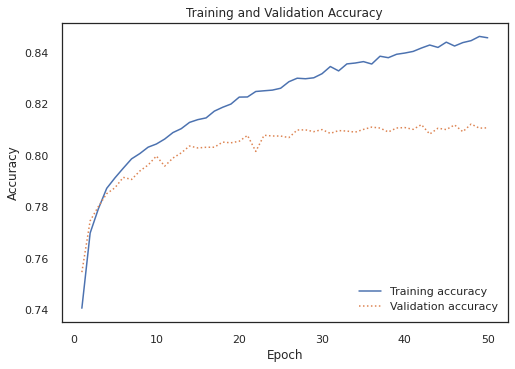

Now, in order to run our Neural Network similarly to our other models, we must wrap it into a KerasClassifier. Using our best hyperparameters and the following function, we are able to return and train a KerasClassifier of our Keras Neural Network.

In [ ]:
def clf(units_1,units_2,dense_activation,dropout_1,learning_rate):
  m = Sequential()
  m.add(Dense(units_1,input_dim=41,activation=dense_activation))
  m.add(Dense(units_2,activation=dense_activation))
  m.add(Dropout(dropout_1))
  m.add(Dense(units_2,activation=dense_activation))
  m.add(Dense(1,activation='sigmoid'))
  m.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  return m
knn = KerasClassifier(build_fn=clf(best_hps['units_1'],best_hps['units_2'],best_hps['dense_activation'],
                                   best_hps['dropout_1'],best_hps['learning_rate']),
                      epochs=48,batch_size=32,verbose=0, random_state=22)

knn.fit(Xn_train,y_train,validation_data=(Xn_test, y_test))

In [26]:
def nn_table(model,Xtrain,ytrain,Xtest,ytest):
  cols = ['Score','Train','Validation']
  nn_table = pd.DataFrame(columns=cols)
  nn_table.set_index("Score",inplace=True)

  train_pred = model.predict(Xtrain)
  nn_table.loc['Precision','Train'] = round(100*precision_score(y_true=ytrain,y_pred=train_pred),1)
  nn_table.loc['Recall','Train'] = round(100*recall_score(y_true=ytrain,y_pred=train_pred),1)
  nn_table.loc['Accuracy','Train'] = round(100*accuracy_score(y_true=ytrain,y_pred=train_pred),1)
  nn_table.loc['F1','Train'] = round(100*f1_score(y_true=ytrain,y_pred=train_pred),1)

  val_pred = model.predict(Xtest)
  nn_table.loc['Precision','Validation'] = round(100*precision_score(y_true=ytest,y_pred=val_pred),1)
  nn_table.loc['Recall','Validation'] = round(100*recall_score(y_true=ytest,y_pred=val_pred),1)
  nn_table.loc['Accuracy','Validation'] = round(100*accuracy_score(y_true=ytest,y_pred=val_pred),1)
  nn_table.loc['F1','Validation'] = round(100*f1_score(y_true=ytest,y_pred=val_pred),1)
  return nn_table

####Train and Validation
From this table we are able to see that the KerasClassifier is slightly over-fitted, but with an Accuracy and Precision score of 81.1% and 79.3% on the validation data, this model is still a contender. 

In [27]:
keras_table = nn_table(knn,Xn_train,y_train,Xn_test,y_test)
keras_table

,Train,Validation
Score,,
Precision,83.7,77.5
Recall,79.9,73.9
Accuracy,86.0,81.3
F1,81.7,75.7


#Model Performance on Validation Data

All of the models have been built and developed using the training dataset. Cross validation was used for each during the Bayesiam Optimization of hyperparameters. The final test before model selection will be to test the data on our validation set. 
Generally, you would either do cross-validation on the training set and then test on final data to evaluate performance, but due to the feature engineering that performed (calculating average time, in minutes, a task gets completed per timezone and hour created) and values were mapped from training to validation (and test) I have cross-validated on the training set and compared performance metrics using validation set. 

In [28]:
VAL_RE = pd.DataFrame(columns=['SGD','LGBM','RF','NN'])

VAL_RE['SGD'] = sgd_table['Validation'].astype('float')
VAL_RE['LGBM'] = lgbm_table['Validation'].astype('float')
VAL_RE['RF'] = rf_table['Validation'].astype('float')
VAL_RE['NN'] = keras_table['Validation'].astype('float')
VAL_RE['Best Score'] = VAL_RE.idxmax(axis=1)
VAL_RE

,SGD,LGBM,RF,NN,Best Score
Score,,,,,
Precision,70.3,78.9,79.2,77.5,RF
Recall,57.1,73.9,73.9,73.9,LGBM
Accuracy,73.7,82.0,82.2,81.3,RF
F1,63.0,76.3,76.5,75.7,RF


Comparing results from the validation data we see that our Neural Network's precision just barely beat our Random Forest's with a value of 79.3%, but the RF comes out on top in terms of accuracy with a value of 81.1%.

Based on the results of testing on validation data, I will not be moving forward with the SGDClassifier. 

#Evaluating on Final Test Set
The final step before model selection is to test each model on the final test set.

The validation set used in the previous step was originally my final test set, but I deicded to run an additional query  right before I was ready to do my final test. This new data is from this query and contains data from tasks that were created and completed AFTER the date of my original query. Since I have the privledge of acquring new product data to test my models on, I thought this would be a true test.

##Models Scores for Final Test Set

In [29]:
#Getting predictions on final data
LGBM_pred, rf_pred, nn_pred = LGBM.predict(Xs_final), RF.predict(X_final), knn.predict(Xn_final)
pred_2, pred_3, pred_4 = LGBM_pred, rf_pred, nn_pred

In [30]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, confusion_matrix, recall_score, f1_score

In [31]:
models_scores_table = pd.DataFrame({'LGBM':[accuracy_score(y_final,pred_2),
                                                        precision_score(y_final,pred_2),
                                                        recall_score(y_final,pred_2),
                                                        f1_score(y_final,pred_2)],

                                       'RF':[accuracy_score(y_final,pred_3),
                                                        precision_score(y_final,pred_3),
                                                        recall_score(y_final,pred_3),
                                                        f1_score(y_final,pred_3)],

                                      'NN':[accuracy_score(y_final,pred_4),
                                                        precision_score(y_final,pred_4),
                                                        recall_score(y_final,pred_4),
                                                        f1_score(y_final,pred_4)]},
                                                                              

                                       
                                      
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

In [32]:
models_scores_table

,LGBM,RF,NN,Best Score
Accuracy,0.773192,0.782486,0.768699,RF
Precision,0.770365,0.761875,0.770222,LGBM
Recall,0.690228,0.735483,0.675911,RF
F1 Score,0.728098,0.748446,0.719991,RF


From this table we are able to see that our Random Forest model is out performing all other models, except when looking at precision, which is where our Neural Network has the best score. 

#Comparing Models using ROC and PRC
The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction.

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. The closer to 1 this value is, the better the model.


Precision-Recall curves (AUPRC) are common metrics for evaluating classification performance for imbalanced problems. Compared with AUROC, AUPRC is a more appropriate metric for highly imbalanced datasets.While our dataset is not highly imbalanced, it is slightly so the AUPRC will be taken into consideration.

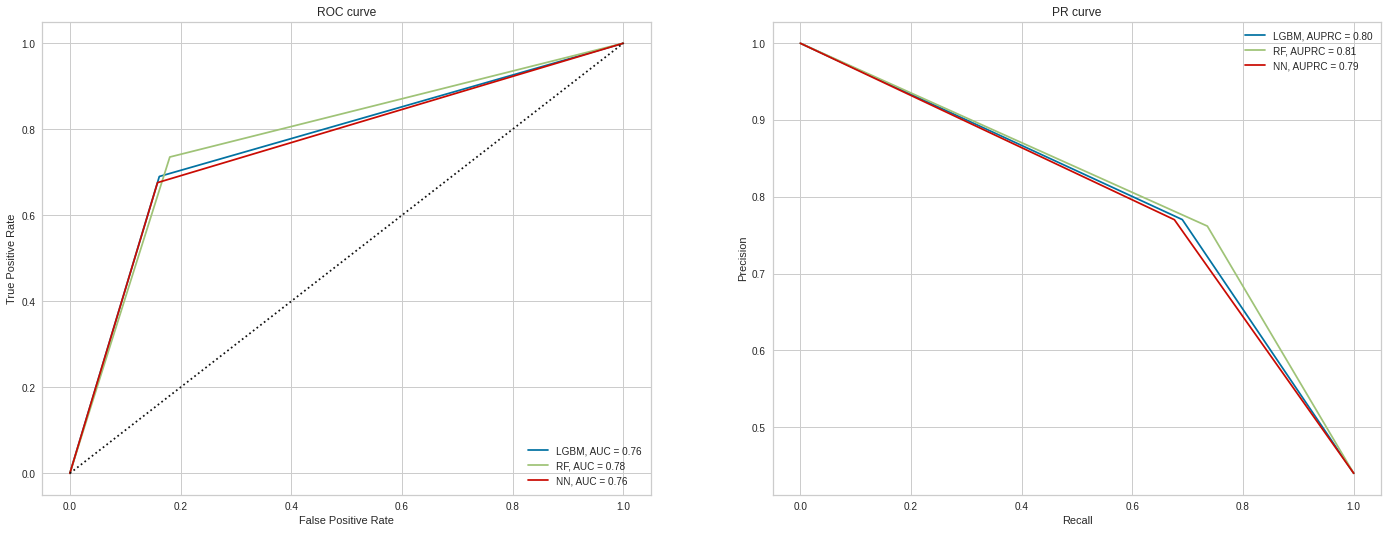

In [33]:
# ROC curve and AUC

fpr_2, tpr_2, threshold = roc_curve(y_final, pred_2)
auc_2 = auc(fpr_2, tpr_2)
fpr_3, tpr_3, threshold = roc_curve(y_final, pred_3)
auc_3 = auc(fpr_3, tpr_3)
fpr_4, tpr_4, threshold = roc_curve(y_final, pred_4)
auc_4 = auc(fpr_4, tpr_4)

# Precision-recall curve and AUPRC

precision_2, recall_2, thresholds = precision_recall_curve(y_final, pred_2)
auprc_2 = auc(recall_2, precision_2)
precision_3, recall_3, thresholds = precision_recall_curve(y_final, pred_3)
auprc_3 = auc(recall_3, precision_3)
precision_4, recall_4, thresholds = precision_recall_curve(y_final, pred_4)
auprc_4 = auc(recall_4, precision_4)

# Plot results
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(24,9) )
plt.subplots_adjust(bottom=0.15)

ax[0].set_title('ROC curve')

ax[0].plot(fpr_2, tpr_2, label = 'LGBM, AUC = %0.2f' % auc_2)
ax[0].plot(fpr_3, tpr_3, label = 'RF, AUC = %0.2f' % auc_3)
ax[0].plot(fpr_4, tpr_4, label = 'NN, AUC = %0.2f' % auc_4)
ax[0].legend(loc = 'lower right')
ax[0].set(ylabel = 'True Positive Rate', xlabel = 'False Positive Rate')
ax[0].plot([0, 1], [0, 1], 'k:')


ax[1].set_title('PR curve')

ax[1].plot(recall_2, precision_2, label = 'LGBM, AUPRC = %0.2f' % auprc_2)
ax[1].plot(recall_3, precision_3, label = 'RF, AUPRC = %0.2f' % auprc_3)
ax[1].plot(recall_4, precision_4, label = 'NN, AUPRC = %0.2f' % auprc_4)
ax[1].legend(loc = 'upper right')
ax[1].set(ylabel = 'Precision', xlabel = 'Recall')




plt.show()

ROC AUC Ranking:


1.   RF (0.78)
2.   LGBM (0.76)
3.   NN (0.75)

AUPRC Ranking:


1.   RF (0.81)
2.   LGBM (0.80)
3.   NN (0.79)


#Compaing Models using Confusion Matrix
Although widely used, classification accuracy and AUC are almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class. While our data is not highly imbalanced, there is an imbalance between target classes. 

The confusion matrix provides more insight into not only the performance of a predictive model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made. 



Text(0.5, 1.0, 'NN')

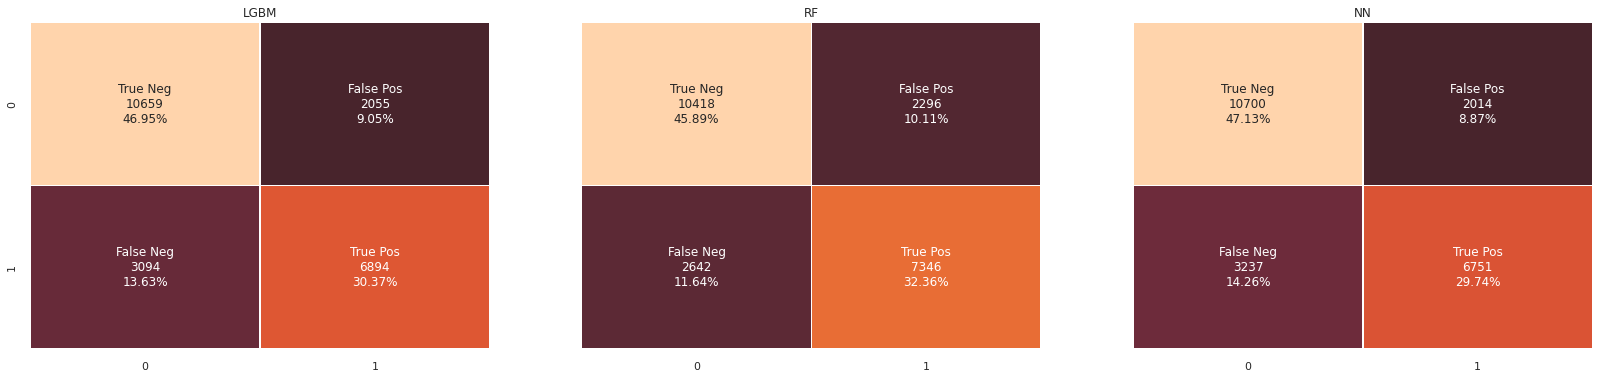

In [35]:
conf2, conf3, conf4 =  confusion_matrix(y_final,pred_2), confusion_matrix(y_final,pred_3), confusion_matrix(y_final,pred_4)

sns.set_theme(style="white")
fig,axes = plt.subplots(1,3, figsize=(28, 6), sharey=True)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                  conf2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      conf2.flatten()/np.sum(conf2)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(2,2)
sns.heatmap(ax=axes[0],data=conf2, center=0, linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, annot=labels2, fmt='')
axes[0].set_title('LGBM')

group_counts = ["{0:0.0f}".format(value) for value in
                  conf3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      conf3.flatten()/np.sum(conf3)]
labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels3 = np.asarray(labels3).reshape(2,2)
sns.heatmap(ax=axes[1],data=conf3, center=0, linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, annot=labels3, fmt='')
axes[1].set_title('RF')

group_counts = ["{0:0.0f}".format(value) for value in
                  conf4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      conf4.flatten()/np.sum(conf4)]
labels4 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels4 = np.asarray(labels4).reshape(2,2)
sns.heatmap(ax=axes[2],data=conf4, center=0, linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, annot=labels4, fmt='')
axes[2].set_title('NN')


#Final Model Selection

###Continuity of Care Lock
The current Continuity of Care lock is a 6 hour lock that is placed on tasks. If we think of this as a machine learning algorithm, the model would be predicting 0 for every record, putting a 6 hour lock on every task assuming the clinician will unlock and complete the task. 

###Predictive Errors
Thinking about our models in these terms, False Negative errors (predicted 0 actually 1) are the same way the current system works. This means False Negative errors are not detrimental to our models. 

The erros that we should be trying to minimize are False Positives (predicted 1 actually 0). False Positives represent tasks where the clinician would unlock and complete a task, but the model incorrectly thinks they would not and unlocks the task and reassigns it to another clinician. 

With this in mind the most important metric for evaluating our models is Precision. 
\begin{align}
        Precision = \frac{True Positives \, }{True Positives + False Positives}
    \end{align}

As the number of FP's decrease, the precision increases. 
###Final Model: Neural Network
Since all 3 of our  models have roughly the same accuracy and AUC, the final model we will be selecting is the one with the highest precision and had the fewest false positives, which is our Neural Network.

#Conclusion

In order to implementing our Neural Network model as the new Continuity of Care lock we will need to assign a cost to:

1. Improvement to Customer Experience by eliminating 6 hour wait time
2. Impact of False Positives on Continuity of Care

    * Pushing patients to a different clinician when their clinician would be available.
